# 16. Prior Sample Size

In lesson 7, when discussing different beta priors, the professor decided on $Be(500, 500)$ as a realistic prior for a fair coin. But how would you decide between that and, say, $Be(10, 10)$? Both have a mean of $.5$, but one is much stronger.

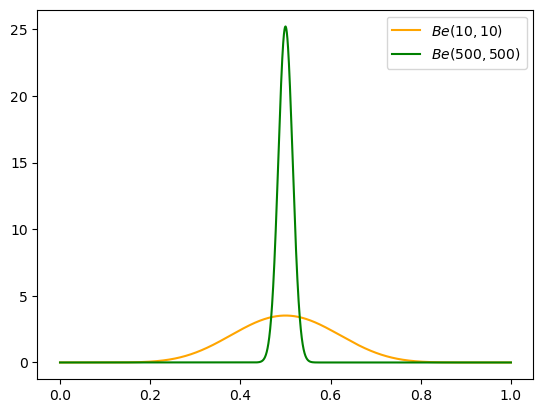

In [13]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

xx = np.linspace(0, 1, 10000)
pdf_10 = beta.pdf(xx, 10, 10)
pdf_500 = beta.pdf(xx, 500, 500)

fig, ax = plt.subplots()

ax.plot(xx, pdf_10, color='orange', label='$Be(10, 10)$')
ax.plot(xx, pdf_500, color='green', label='$Be(500, 500)$')

ax.legend()
plt.show()

Effective sample size, as defined in the lecture, is an informal measure of the strength of a prior as it interacts with a particular likelihood to contribute to the posterior.

```{warning}
Effective sample size has another, more common meaning in a Bayesian context. From the [Stan docs](https://mc-stan.org/docs/reference-manual/effective-sample-size.html), "The amount by which autocorrelation within the chains increases uncertainty in estimates can be measured by effective sample size (ESS)." This is a totally unrelated use of the term, so don't get them confused!
```

So if we're using a beta-binomial conjugate model, we would say the ESS of $Be(10, 10)$ is $\alpha + \beta = 20$, while $Be(500, 500)$ is $1000$.

We've had questions about how the Normal-Gamma ESS was calculated on the last slide. I believe this is the reasoning: when you define the Normal distribution with precision and have a Gamma prior, the (conjugate) posterior is $Gamma\left(\alpha + n/2, \beta + 1/2 \cdot \sum_{i=1}^{n} (x_i - n)^2\right)$, so the mean is $\frac{\alpha + n/2}{\beta + 1/2 \cdot \sum_{i=1}^{n} (x_i - n)^2}$. Then Professor Vidakovic is informally comparing prior mean to posterior mean:

$$\frac{\alpha}{\beta} \rightarrow \frac{\alpha + n/2}{\beta + 1/2 \cdot \sum_{i=1}^{n} (x_i - n)^2} \rightarrow ESS = 2\alpha$$

## Spiegelhalter's categories and current recommendations

The professor mentions three different types of priors: vague, skeptical, and enthusiastic {cite}`spiegelhalterpriors`. These are similar to the five categories mentioned in the Stan [Prior Choice Recommendations](https://github.com/stan-dev/stan/wiki/Prior-Choice-Recommendations).

Both Stan and [PyMC](https://www.pymc.io/projects/docs/en/stable/learn/core_notebooks/posterior_predictive.html) developers recommend prior predictive checks for your models. When combined with visualizations, these can help you check how realistic your priors are.